# Step : 1

#### import the pacakges

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Data1: Here we will take the data which follows normal distribution

- Data2: Based on above data we will create a another data by multiplying some value

- so that both data sets have multicollinearity

- The both datasets have some covariance

- Then we will apply PCA

- Will create two new PCs, will check the Covariance matrix again

- So the PCs covariance should be zero

# step : 2

#### create the data

In [3]:
# will create a data having some multicollinearity
x = np.random.normal(200,10,500) # mean = 200 , std = 10, 
x.mean()

200.74095749743

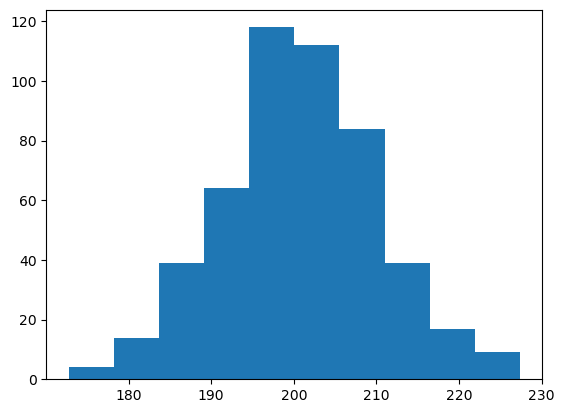

In [4]:
plt.hist(x)
plt.show()

In [5]:
# create a data y , should be correlated to X
y = 0.5*x + np.random.normal(10,5,500)
# we are taking random samples
# and we are adding x data to the samples
print("mean:",y.mean())
print("std:",y.std())



mean: 110.54299383911173
std: 6.976269902045172


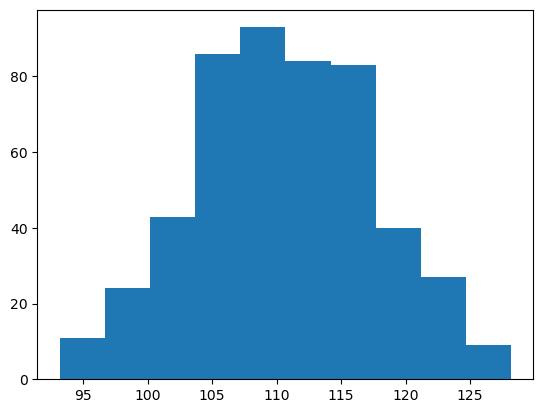

In [6]:
plt.hist(y)
plt.show()

# Step : 3 

#### Perform the scatter plot

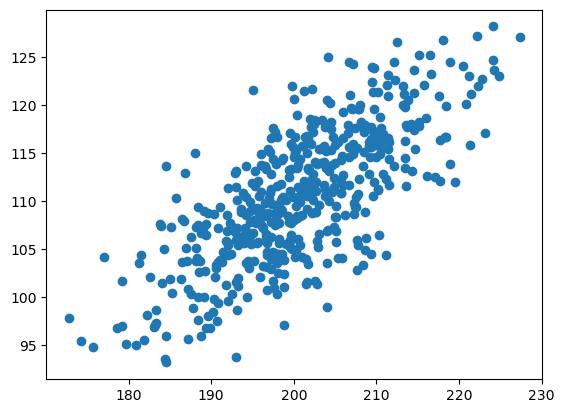

In [7]:
plt.scatter(x,y)
plt.show()

# Obervations

- Both points are correlated each other 
- Both points are not orthogonal to each other
- Perform covariance matrix for better idea 

# Step : 4

#### Covariance Matrix

In [8]:
cov_mat = np.cov(x,y)
cov_mat

array([[88.91814807, 48.41516994],
       [48.41516994, 48.76587349]])

In [9]:
# variance = 99.03
# variance = x
a = np.sum(np.multiply((x-np.mean(x)),(y-np.mean(y))))/(len(x)-1)
a # covariance

48.41516993615165

<Axes: >

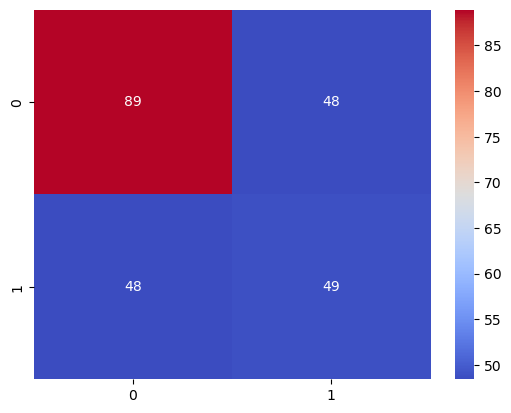

In [10]:
import seaborn as sns
sns.heatmap(cov_mat,annot=True,cmap="coolwarm")

# Step : 5 

#### Perform the PCA

- to reduce the dimensions
- to avoid multicollinearity
- to make data has orthogonal

#### Will calculate eigen vectors and eigen values of covariance matrix

In [11]:
from numpy.linalg import eig
eig_values,eig_vectors=eig(cov_mat)

In [12]:
eig(cov_mat)

EigResult(eigenvalues=array([121.25460439,  16.42941718]), eigenvectors=array([[ 0.83157692, -0.55540961],
       [ 0.55540961,  0.83157692]]))

In [30]:
eig_vectors

array([[ 0.86393101, -0.50361018],
       [ 0.50361018,  0.86393101]])

In [31]:
eig_values

array([134.52964304,  16.74420149])

# Observations :

- We have two data samples x and y, so we have **2x2 covaraiance matrix**

- When we apply eigen values and eigen vectors on 2x2 cov matrix, will get **two eigen values and two eigen vectors**

- Eigen vectors will give the indicaton to **which direction data should flow**

- If you see eigen vectors the magnitude is same but the direction is different

- The dot product of eigen values either one or zero, indicates **orthogonality**

- Eigen value represnts how much data should flow along that particular direction

#### Checkpoint - 1

- Perform the Dot product of two eigen Vectors
- cos90 is zero
- we are expecting dot product of two eigen vectors is zero
- dot product mean cos
- cross product means sin
- dot product : cosine similarity

In [34]:
v1 = eig_vectors[0]
v2 = eig_vectors[1]
np.dot(v1,v2)

0.0

#### Checkpoint - 2

- Data Variance along each direction
- Percentage of data flows in each direction
- we will use eigen values , each eigen value divided by sum of the eigen values

In [38]:
eig_values

array([134.52964304,  16.74420149])

In [41]:
134/(134+16),16/(134+16)

(0.8933333333333333, 0.10666666666666667)

In [39]:
print("the variance percentage:",eig_values[0]*100/sum(eig_values))
print("the variance percentage:",eig_values[1]*100/sum(eig_values))

the variance percentage: 88.93119855720575
the variance percentage: 11.068801442794252


# Step : 6 

#### Create a new PC

In [49]:
z = np.vstack([x,y]).T

In [50]:
new_data = np.dot(z,eig_vectors)
new_data

array([[ 2.11718786e+02, -4.78309894e+00],
       [ 2.18406699e+02, -7.24415785e+00],
       [ 2.40375953e+02, -1.11722327e+01],
       [ 2.40986192e+02, -6.91918617e+00],
       [ 2.59630984e+02, -5.60829121e+00],
       [ 2.10528524e+02, -1.21297236e+01],
       [ 2.32311026e+02, -6.99762322e+00],
       [ 2.13040396e+02, -6.49695818e+00],
       [ 2.37594454e+02, -9.28018296e+00],
       [ 2.19869597e+02, -1.43376883e+01],
       [ 2.45775914e+02, -1.61819144e+01],
       [ 2.42658668e+02, -7.56234017e+00],
       [ 2.29162390e+02, -1.00595120e+01],
       [ 2.07406066e+02, -7.02675791e+00],
       [ 2.10569975e+02, -3.54282687e+00],
       [ 2.44411945e+02, -3.91025034e+00],
       [ 2.39022084e+02,  4.58632534e+00],
       [ 2.48721472e+02, -6.76856827e+00],
       [ 2.14089698e+02, -1.46364223e+01],
       [ 2.29322907e+02, -1.16855279e+01],
       [ 2.11323821e+02, -6.57210731e+00],
       [ 2.16992853e+02, -1.30215249e+01],
       [ 2.37425982e+02, -9.39850755e+00],
       [ 2.

In [51]:
new_data = pd.DataFrame(new_data,columns= ["PC1","PC2"])
new_data

,PC1,PC2
0,211.718786,-4.783099
1,218.406699,-7.244158
2,240.375953,-11.172233
3,240.986192,-6.919186
4,259.630984,-5.608291
...,...,...
495,234.682484,-9.534704
496,210.908903,-9.568042
497,226.184858,5.448263
498,232.235088,-9.786427


# Step : 7

#### Check_Point : 3 (Covariance of new data)

In [55]:
np.cov(new_data["PC1"],new_data["PC2"])

array([[1.34529643e+02, 8.58987786e-15],
       [8.58987786e-15, 1.67442015e+01]])

# Step - 8

#### Scatter plot of new PC data

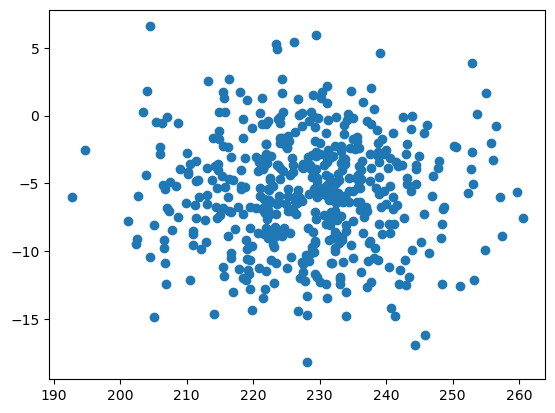

In [63]:

plt.scatter(new_data["PC1"],new_data["PC2"])
plt.show()

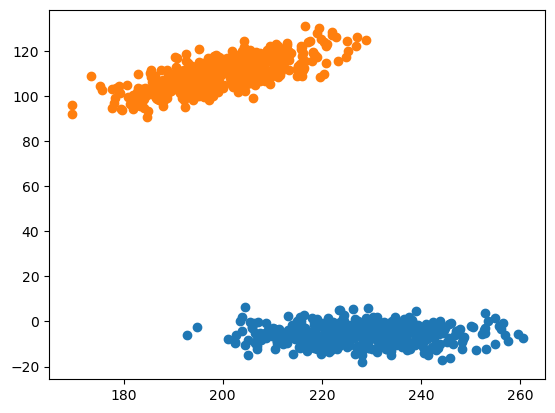

In [64]:
plt.scatter(new_data["PC1"],new_data["PC2"])
plt.scatter(x,y)
plt.show()

# Obsevations

- We create a new data have two pcs
- The two pcs include old data
- The two pcs are independent to each other
- The varianvce along PC1 is greater than PC2
- So we can choose only one component i.e PC1

# Using PAckage 

In [67]:
import numpy as np 
import pandas as pd
from sklearn.decomposition import PCA

In [68]:
x = np.random.normal(200,10,500)
y = 0.5*x +np.random.normal(10,5,500)
z = np.vstack([x,y]).T

In [69]:
pca = PCA(n_components=2)
pca.fit(z)

PCA(n_components=2)

In [70]:
pca.transform(z)

array([[ 1.18181048e+01,  6.98714359e+00],
       [-2.09956980e+01, -6.41758351e+00],
       [ 5.43608303e+00, -2.00356099e+00],
       [-3.83238169e+01, -1.86217301e+00],
       [-1.70241929e+01,  4.34244791e+00],
       [-2.26519197e+01,  5.93128043e+00],
       [-2.44763486e+00, -2.43386164e+00],
       [-7.65781053e+00, -4.47548039e-01],
       [-7.87141204e+00, -2.38202730e+00],
       [ 2.56230229e+01,  4.21785577e+00],
       [ 1.81968633e+01,  4.40163367e+00],
       [ 7.09400470e+00, -6.84902446e+00],
       [-3.22635705e+00,  1.42185505e+00],
       [-2.84295241e+00,  4.57746613e+00],
       [-6.83348057e+00, -1.29478054e-01],
       [ 2.48016265e+00,  5.69420051e+00],
       [-3.33346259e+00, -4.96683137e+00],
       [-1.86220431e+00,  3.14860352e+00],
       [ 5.65024544e+00,  6.54962055e-01],
       [-8.02586177e+00,  7.30149290e-01],
       [-4.57675629e+00, -5.67066312e+00],
       [ 2.75672290e+00, -1.71392099e+00],
       [-1.00652891e+01, -2.23334699e+00],
       [ 7.

# Explained Variance Ratio

- Explained Variance ratio means variance precentage in each axis

In [71]:
pca.explained_variance_ratio_

array([0.85280831, 0.14719169])

# Explained Variance

- It is same as eigen values

In [72]:
pca.explained_variance_

array([121.88081081,  21.03619612])

In [17]:
import pandas as pd

file_name = r"C:\Users\chand\Downloads\winequality_red.csv"
wine_df = pd.read_csv(file_name)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [21]:
X= wine_df.drop("quality",axis=1)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X)

PCA(n_components=6)

In [34]:
pca_data=pca.transform(X)  # Input data
len(pca_data[0]),len(pca_data)

# Original data has 1599 rows
# Original data has 11 columns is converted into 6 columns
# Thats why we each tuple 6 values are there

(6, 1599)

In [14]:
eig_vectors

array([[ 0.83157692, -0.55540961],
       [ 0.55540961,  0.83157692]])

In [27]:

new_data=pd.DataFrame(pca_data,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
new_data

,PC1,PC2,PC3,PC4,PC5,PC6
0,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,0.198018
1,22.037724,4.408322,-0.310378,-0.199938,-0.557109,0.301325
2,7.162673,-2.501461,-0.581868,-0.219069,-0.552934,0.205114
3,13.430063,-1.951122,2.634040,-1.574059,-0.063806,-0.089092
4,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,0.198018
...,...,...,...,...,...,...
1594,1.129111,16.313102,-1.860069,-0.257109,-0.200974,0.058238
1595,9.489984,21.627525,-1.986558,-0.027199,0.443711,-0.040335
1596,-3.431354,14.271243,-1.750719,0.174652,0.236271,-0.089513
1597,1.132878,16.316167,-2.134414,-0.235388,-0.519028,-0.015548


In [29]:
new_data['quality']=wine_df['quality']

In [30]:
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,quality
0,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,0.198018,5
1,22.037724,4.408322,-0.310378,-0.199938,-0.557109,0.301325,5
2,7.162673,-2.501461,-0.581868,-0.219069,-0.552934,0.205114,5
3,13.430063,-1.951122,2.634040,-1.574059,-0.063806,-0.089092,6
4,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,0.198018,5
...,...,...,...,...,...,...,...
1594,1.129111,16.313102,-1.860069,-0.257109,-0.200974,0.058238,5
1595,9.489984,21.627525,-1.986558,-0.027199,0.443711,-0.040335,6
1596,-3.431354,14.271243,-1.750719,0.174652,0.236271,-0.089513,6
1597,1.132878,16.316167,-2.134414,-0.235388,-0.519028,-0.015548,5


In [31]:
pca.explained_variance_ratio_
# 6 pcs has different variances
# first variance has 0.94, which means 94%

array([9.46576976e-01, 4.83683046e-02, 2.58917183e-03, 1.51896798e-03,
       8.73553990e-04, 3.45607218e-05])

In [32]:
np.sum(pca.explained_variance_ratio_)

0.9999615354947833

In [33]:
pca.explained_variance_

array([1.13380708e+03, 5.79354108e+01, 3.10130228e+00, 1.81941532e+00,
       1.04634036e+00, 4.13967294e-02])